# Import Python Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Import two data set 
### 1. Customer Details as cust and 
### 2. Card Details as card

In [103]:
cust = pd.read_csv("C:\Technology\\HeroVired\\Capston\\Customer Details.csv", encoding='ISO-8859-1')

card = pd.read_csv(r"C:\Technology\\HeroVired\\Capston\\Card Details.csv", encoding='ISO-8859-1')

### Joining two datasets as data. Since both the datasets have distinct columns except CustomerID
### Here Concat funtion keys are not used since, both the datasets have same order and number of CustomerIDs

In [104]:
data = pd.concat([cust,card[['Income','Limit','Rating','Cards','Balance']]], axis=1)
data

,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education,Income,Limit,Rating,Cards,Balance
0,Katherine Bettcher,0002-ORFBO,30,Married,Male,Caucasian,Master,105.038,9142,734,3,232
1,Alejandro Graham,0002-ORFBOA,71,Married,Male,Asian,Bachelor,69.820,4223,389,1,924
2,Priscilla Ian,0002-ORFBOC,46,Seperated,Male,African American,Senior Secondary,17.441,2430,253,1,20
3,Ovella,0002-ORFBOCH,42,Married,Female,Caucasian,Senior Secondary,39.368,3829,248,3,813
4,Juliann,0002-ORFBOH,30,Married,Male,African American,Doctorate,56.375,2850,258,1,109
...,...,...,...,...,...,...,...,...,...,...,...,...
32542,Oletta,9992-UJOELH,34,Unmarried,Male,Caucasian,Bachelor,32.930,4222,308,4,162
32543,Leesa Hugo,9993-LHIEB,61,Married,Female,Caucasian,Senior High School,12.469,5645,311,2,487
32544,Oliva,9993-LHIEBH,64,Unmarried,Male,Caucasian,Senior Secondary,64.167,3116,285,3,576
32545,Hank Hunter,9995-HOTOH,77,Unmarried,Female,Caucasian,Bachelor,20.970,1356,161,2,0


In [105]:
# Categorical data as cat_data
cat_data = data.select_dtypes(include=['object']).columns.tolist()
cat_data

['Name', 'CustomerID', 'Marital Status', 'Gender', 'Ethnicity', 'Education']

In [106]:
# Numerical data as num_data
num_data = data.select_dtypes(include=np.number).columns.tolist()
num_data

['Age', 'Income', 'Limit', 'Rating', 'Cards', 'Balance']

### EDA Univariate Analysis
<br>In the below fig, a histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.
<br>All the variables "Age, Income, Limit, Rating, Cards and Balance" are positively skewed distribution.

Age
Skew : 0.04


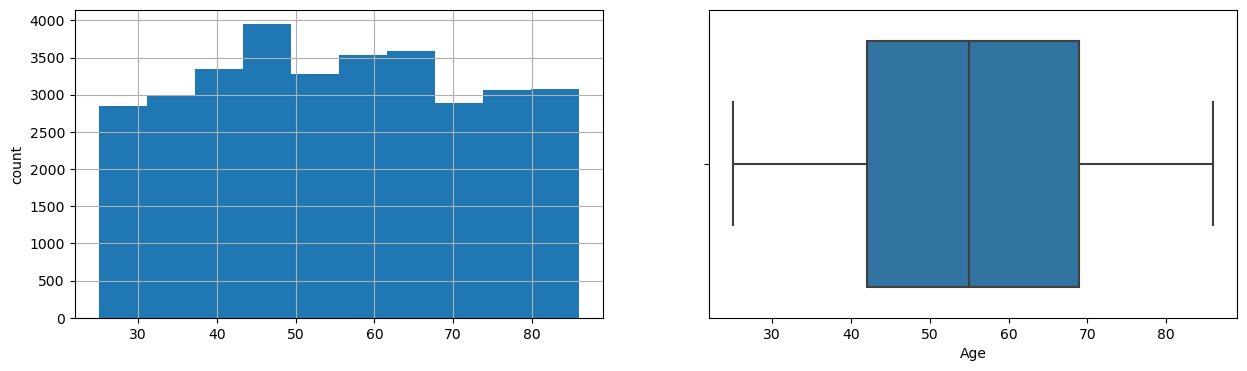

Income
Skew : 1.55


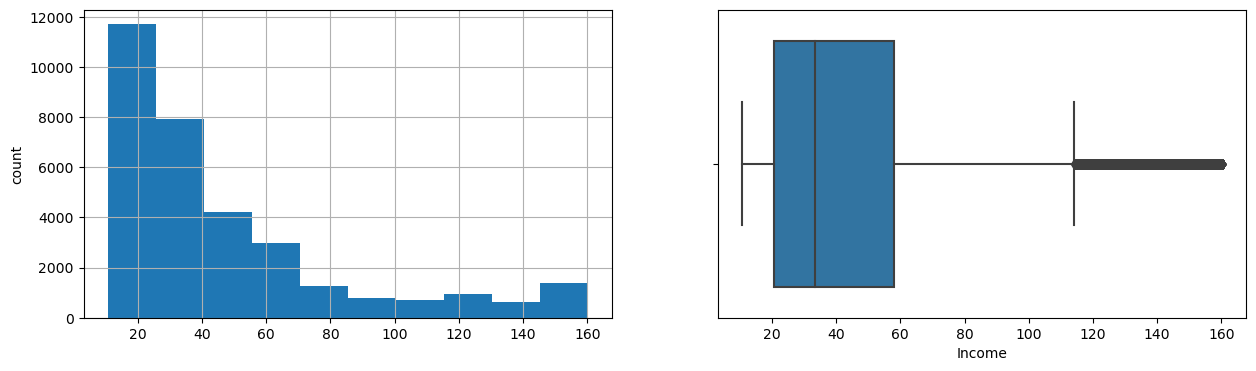

Limit
Skew : 0.76


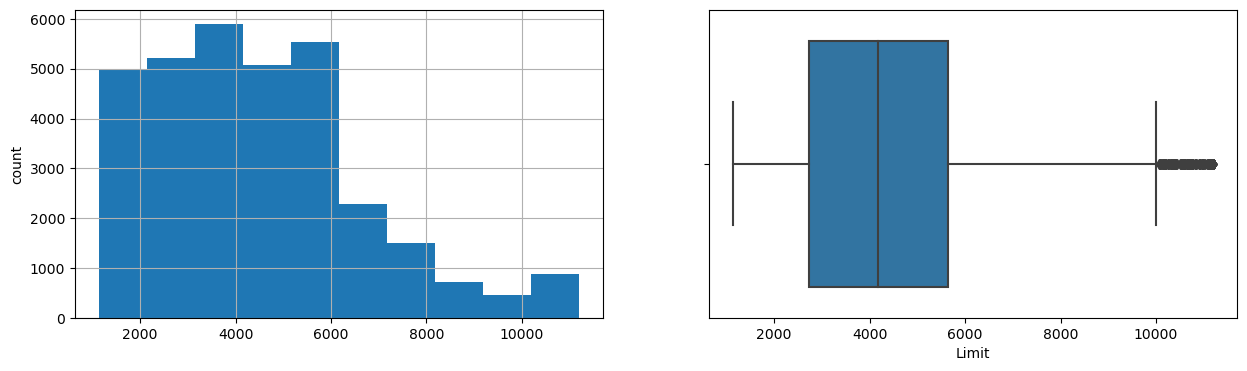

Rating
Skew : 0.64


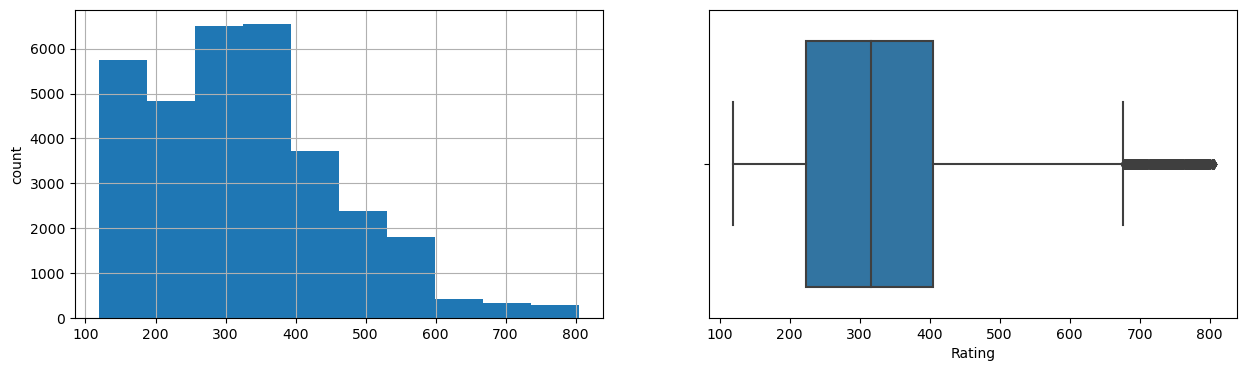

Cards
Skew : 0.58


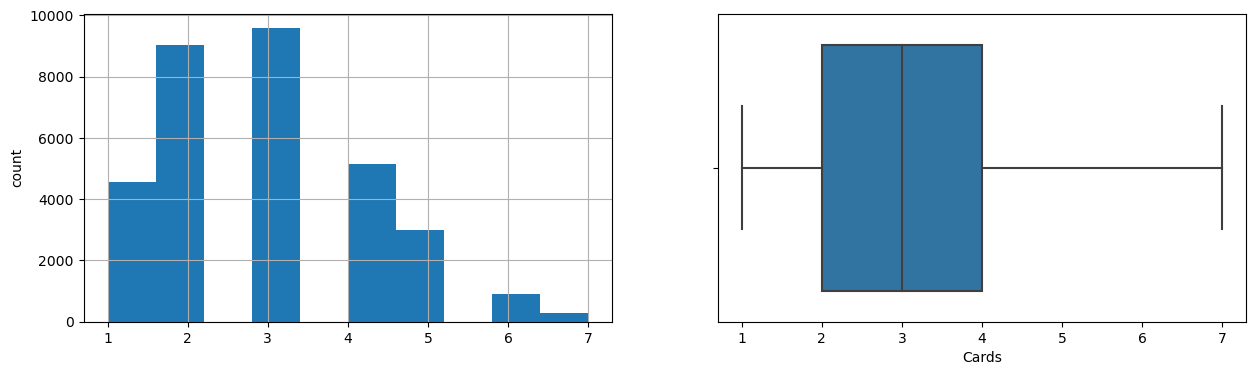

Balance
Skew : 0.9


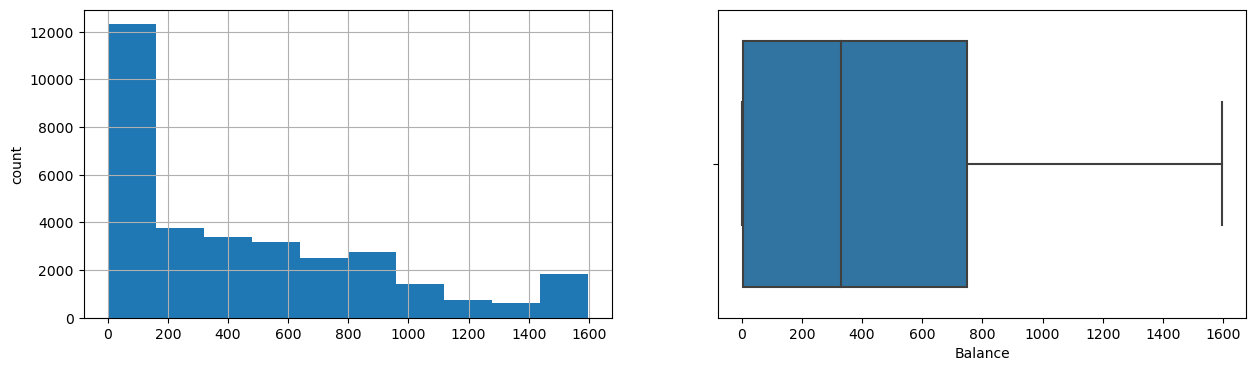

In [107]:
for col in num_data:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=True)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [108]:
round(data.agg(['skew', 'kurtosis']).transpose(),2)

,skew,kurtosis
Age,0.04,-1.05
Income,1.55,1.62
Limit,0.76,0.40
Rating,0.64,0.23
Cards,0.58,-0.02
Balance,0.90,-0.12


Above data shows that Income data is higly positive skewed. That does not seems to be swaying analysis and may rather help in analysing high income card holders.

### Performing correlation analysis to identify factors that are correlated with card limit.

In [109]:
# Find the pearson correlations matrix
corr = round(data.corr(method = 'pearson'),2)
corr

,Age,Income,Limit,Rating,Cards,Balance
Age,1.00,-0.01,-0.00,-0.00,0.00,0.01
Income,-0.01,1.00,0.26,0.24,0.02,0.18
Limit,-0.00,0.26,1.00,0.63,0.03,0.54
Rating,-0.00,0.24,0.63,1.00,0.04,0.60
Cards,0.00,0.02,0.03,0.04,1.00,0.04
Balance,0.01,0.18,0.54,0.60,0.04,1.00


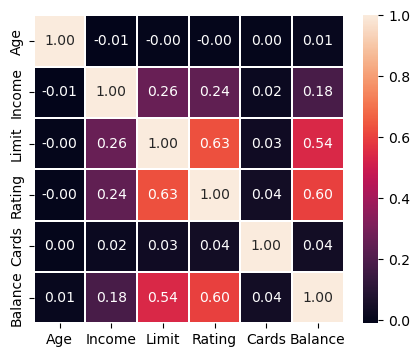

In [110]:
plt.figure(figsize=(5,4), dpi =100)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.2)
plt.show()

We can infer following findings:
<br>Credit rating and income are both positively correlated with card limit, meaning that customers with higher rating and incomes tend to have higher card limits.

### Relationship of Marital Status with Numerical data

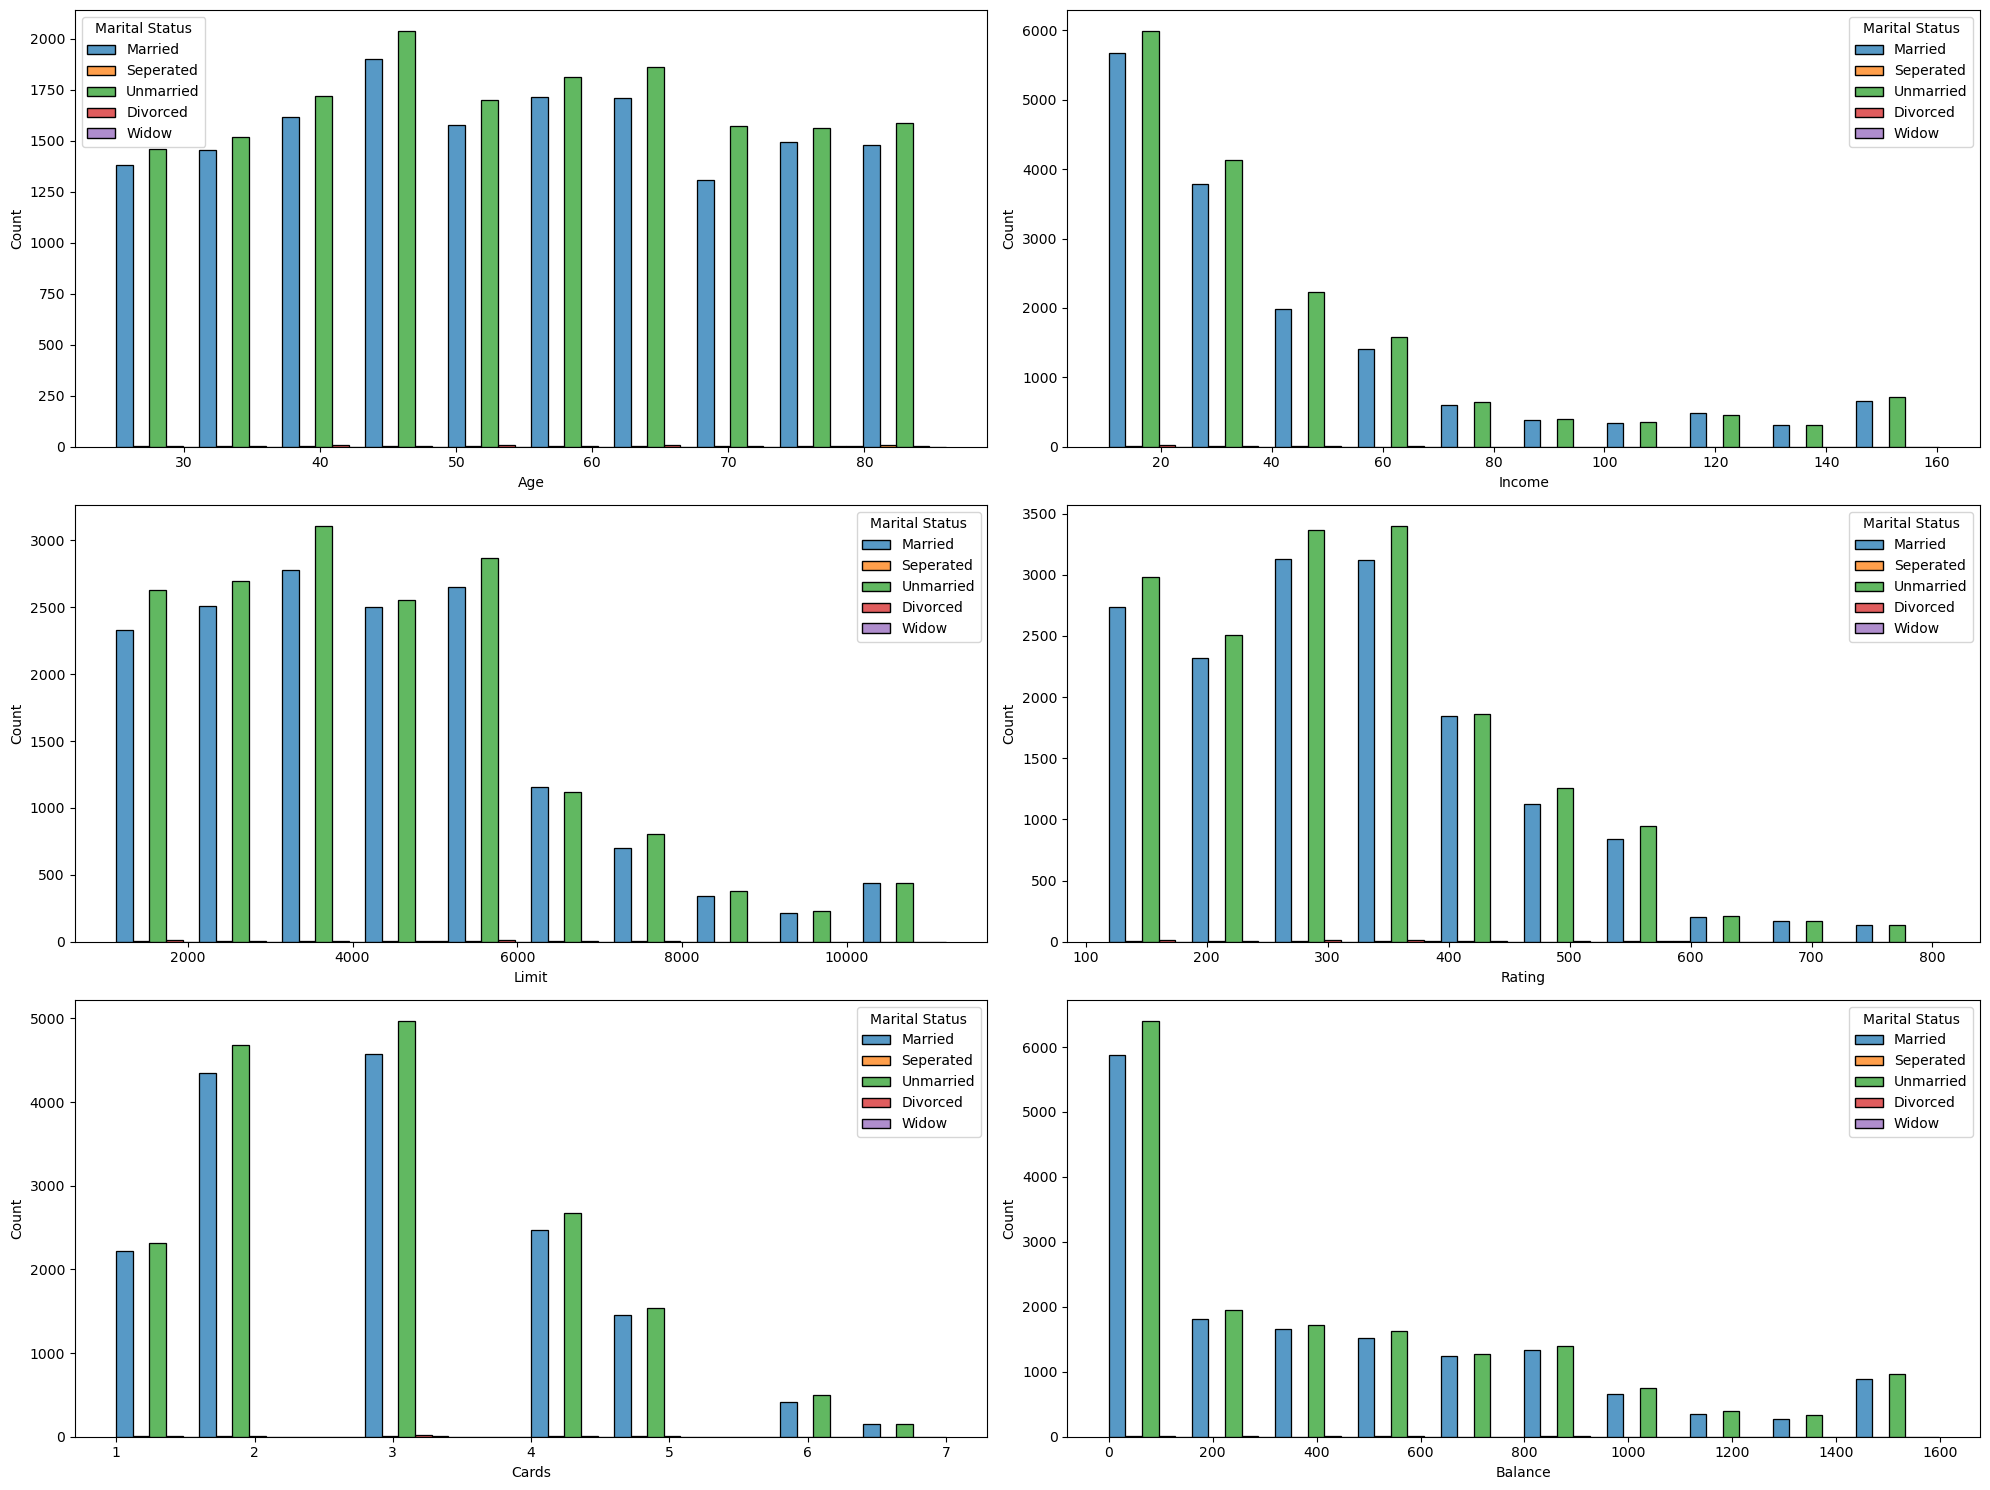

In [111]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))
ax = ax.flatten()

for i, var in enumerate(num_data):
    sns.histplot(x=var, data = data, ax = ax[i], bins=10, hue='Marital Status',multiple='dodge')

fig.tight_layout()

In [112]:
round(data.groupby(['Marital Status'])[num_data].mean(),2)

,Age,Income,Limit,Rating,Cards,Balance
Marital Status,,,,,,
Divorced,55.92,39.12,4368.06,310.69,2.82,445.80
Married,55.35,46.52,4439.44,327.32,2.90,447.69
Seperated,58.00,46.60,4118.35,328.03,2.51,474.84
Unmarried,55.58,46.48,4401.73,326.15,2.91,447.93
Widow,61.78,62.63,4654.44,437.44,3.22,639.67


We can infer following findings:
<br>Only married and unmarried are evident in the dataset. Seperated, Divorced and Widow are negligible in dataset.
<br>Mostly unmarried are max in all cardholder ages and Widow are aged among all.
<br>Widow are highest earner and Divorced are least earner. After Widow, Married card holder have higher limit.
<br>Rating-wise Widow stands top the list.
<br>Maximum number of cards are held by unmarried.
<br>Most of card holders are using to the maximum limit of the card. Unmarried are slightly higher than married in spending over cards and also hold maximum balance.

### Relationship of Gender with Numerical data

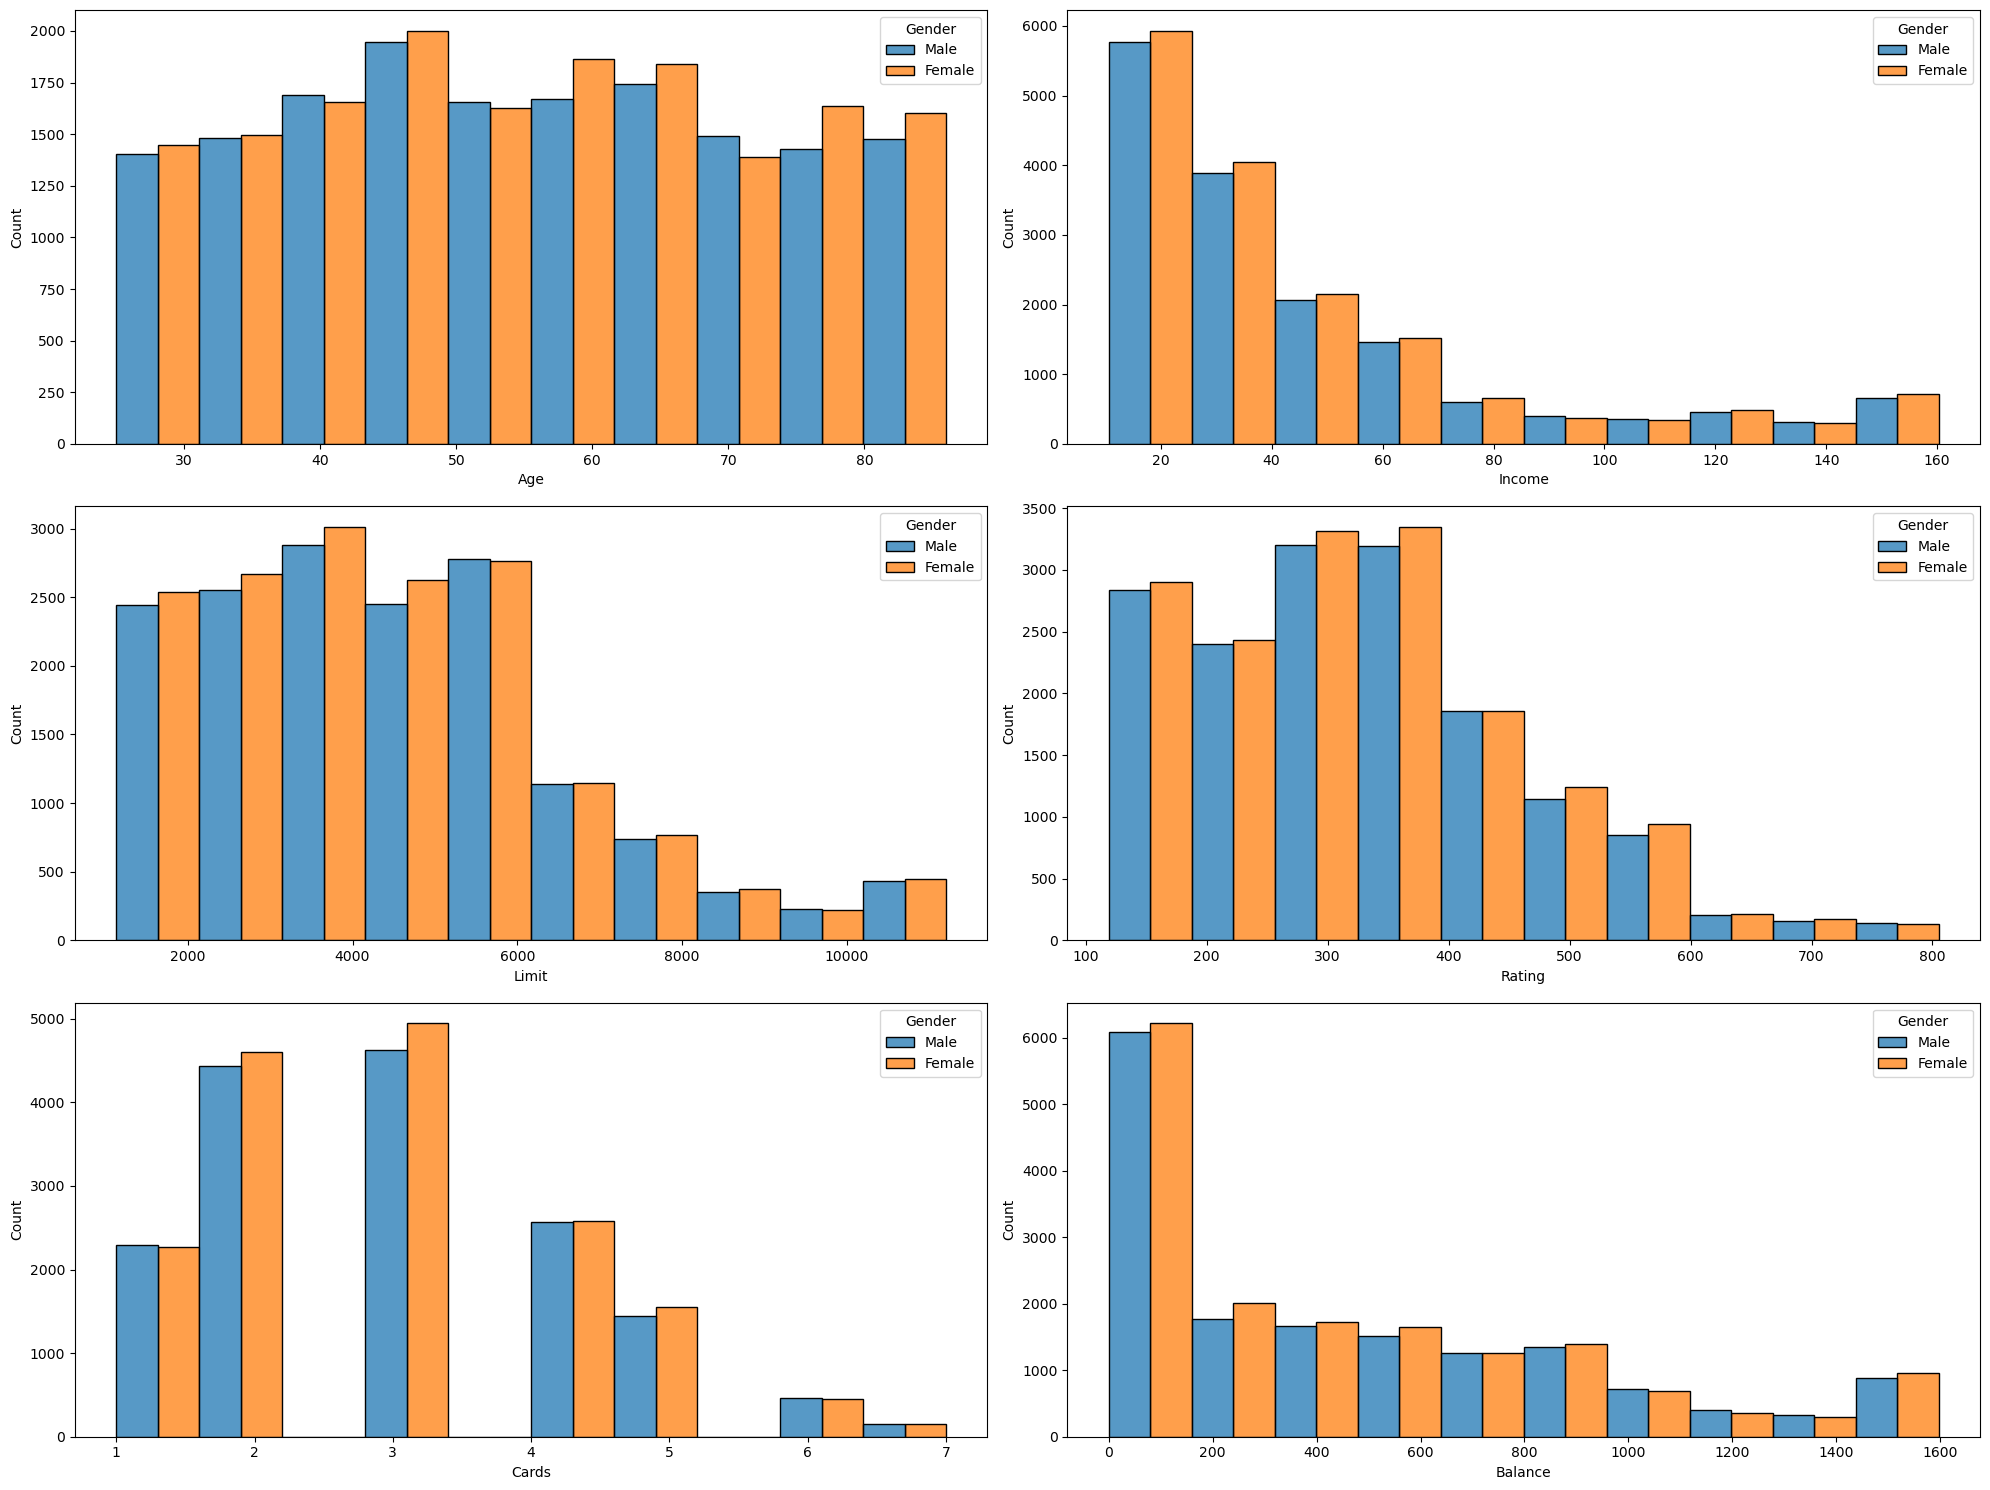

In [113]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))
ax = ax.flatten()

for i, var in enumerate(num_data):
    sns.histplot(x=var, data = data, ax = ax[i], bins=10, hue='Gender',multiple='dodge')

fig.tight_layout()

In [114]:
round(data.groupby(['Gender'])[num_data].mean(),2)

,Age,Income,Limit,Rating,Cards,Balance
Gender,,,,,,
Female,55.67,46.53,4410.73,327.69,2.91,445.48
Male,55.27,46.45,4428.64,325.71,2.90,450.40


We can infer following findings:
<br>Female card holders are slightly higher compare to Male in all the parameters.
<br>Maximum female card holders are at lower as well as higher income braket.
<br>Male card holders have better limit.
<br>Female card holders have better rating.
<br>Both stands at same for maximum number of cards are held.
<br>Male are keeping good balance compare to female.

### Relationship of Ethnicity with Numerical data

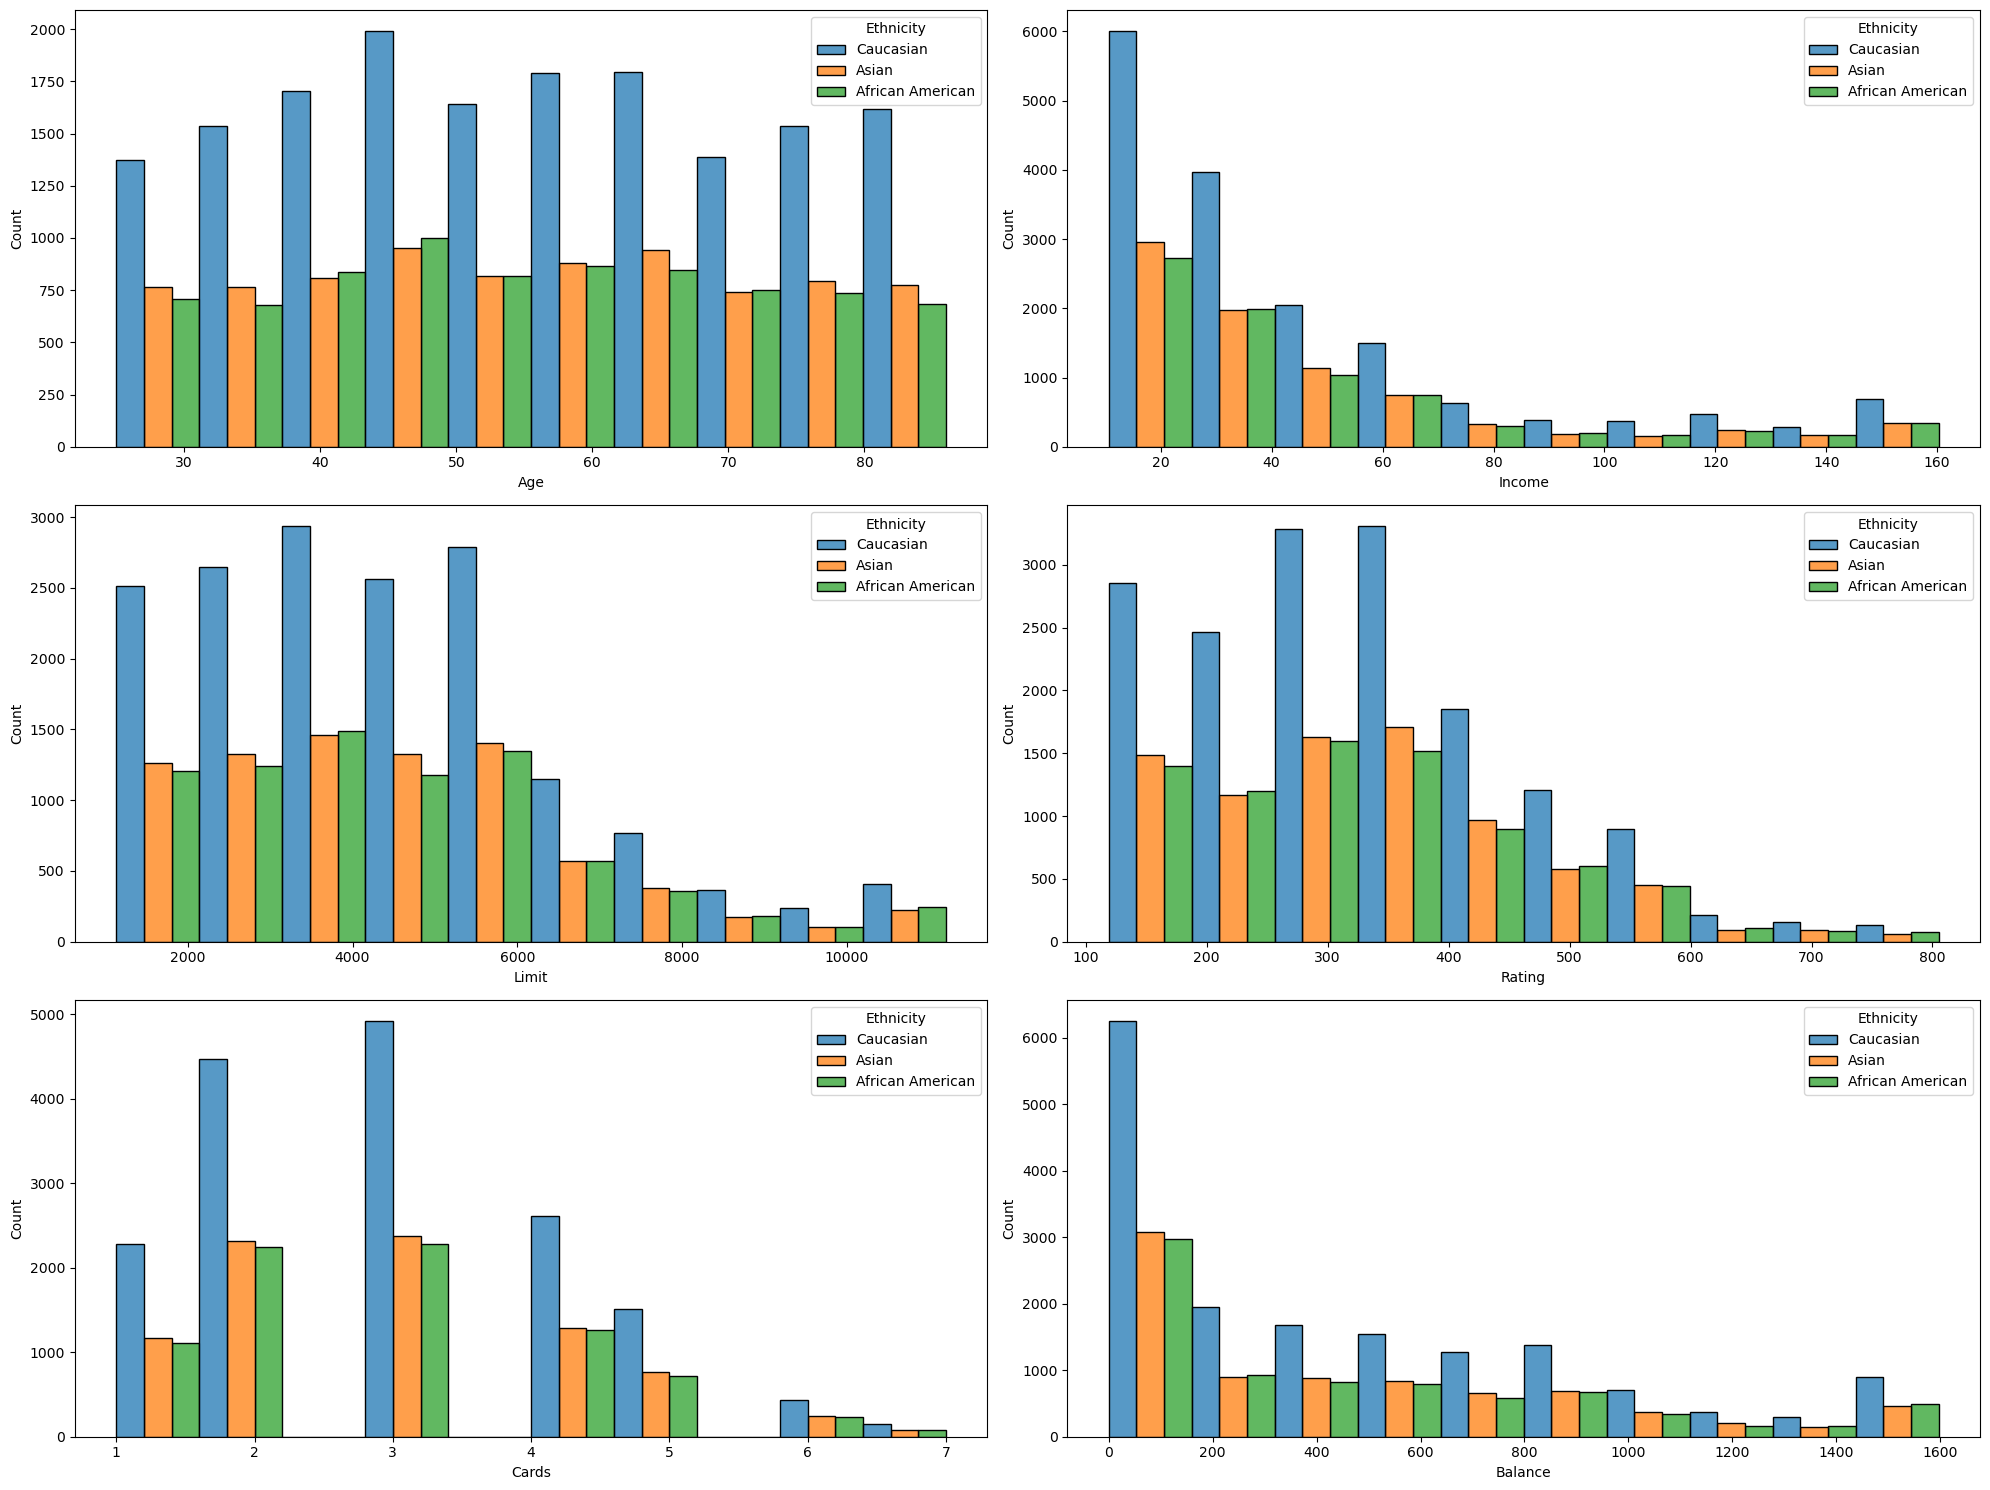

In [115]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))
ax = ax.flatten()

for i, var in enumerate(num_data):
    sns.histplot(x=var, data = data, ax = ax[i], bins=10, hue='Ethnicity',multiple='dodge')

fig.tight_layout()

In [116]:
round(data.groupby(['Ethnicity'])[num_data].mean(),2)

,Age,Income,Limit,Rating,Cards,Balance
Ethnicity,,,,,,
African American,55.28,47.07,4441.82,327.73,2.91,453.81
Asian,55.50,46.53,4414.91,326.37,2.90,452.96
Caucasian,55.56,46.19,4411.05,326.41,2.91,442.48


We can infer following findings:
<br>50% of card holders are from Caucasian.
<br>African American are higher in income, limit, rating and balance.
<br>African American are comparitively younger.

### Relationship of Education with Numerical data

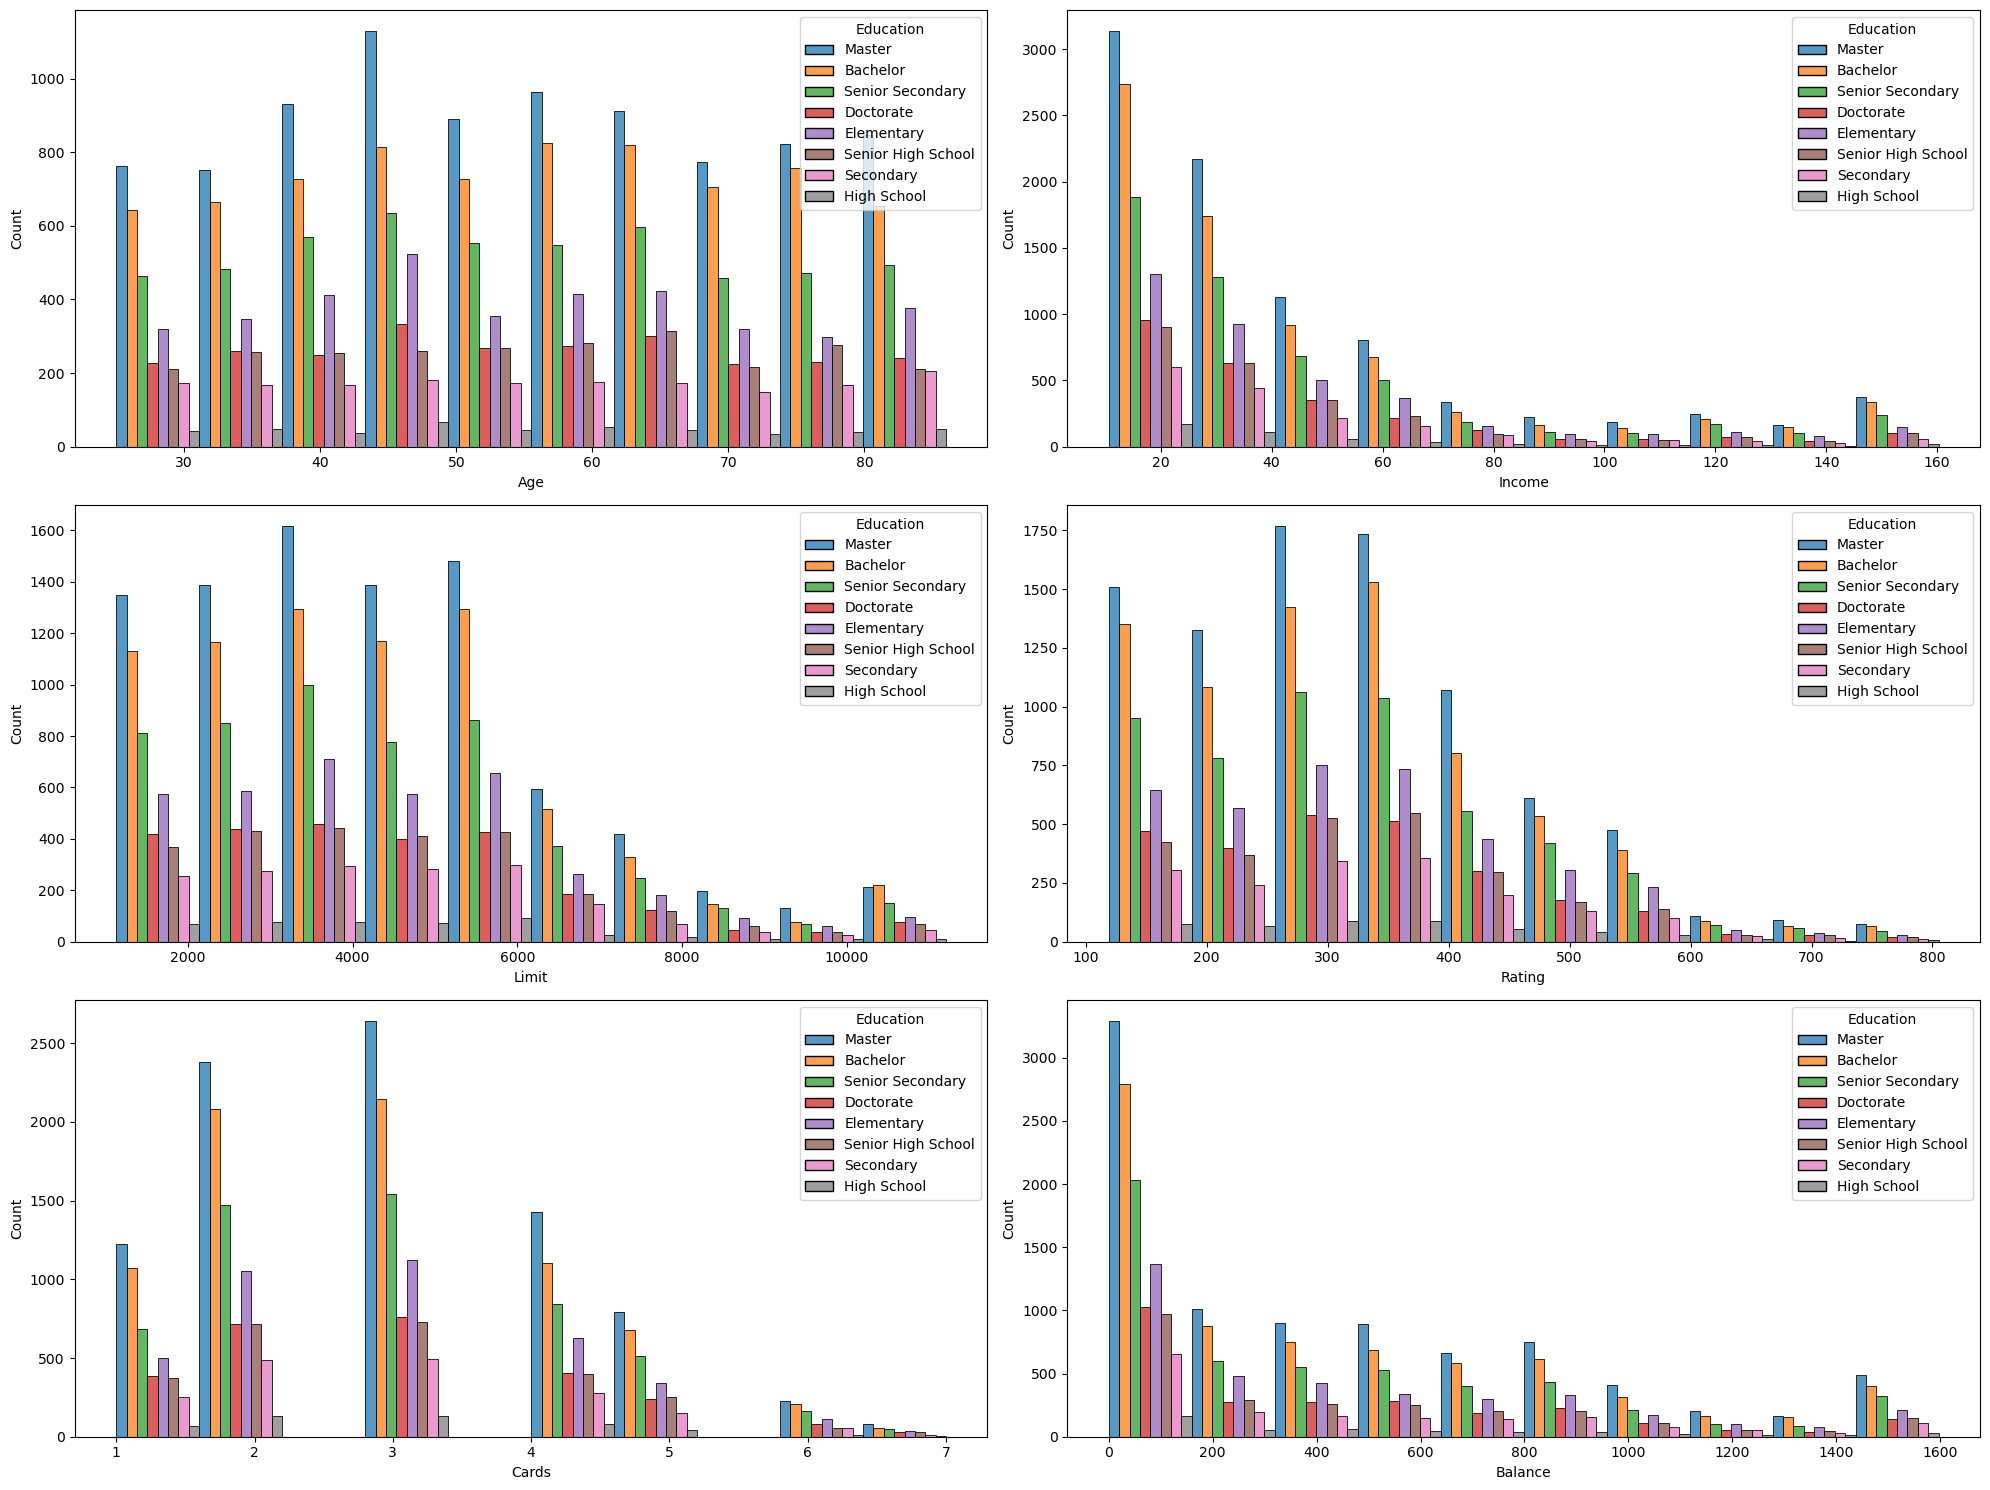

In [117]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20,15))
ax = ax.flatten()

for i, var in enumerate(num_data):
    sns.histplot(x=var, data = data, ax = ax[i], bins=10, hue='Education',multiple='dodge')

fig.tight_layout()

In [118]:
round(data.groupby(['Education'])[num_data].mean(),2)

,Age,Income,Limit,Rating,Cards,Balance
Education,,,,,,
Bachelor,55.80,46.39,4417.32,325.06,2.87,444.04
Doctorate,55.11,45.44,4373.73,322.43,2.90,436.51
Elementary,55.16,47.24,4439.21,329.75,2.93,455.34
High School,54.99,46.94,4450.93,338.41,2.92,464.59
Master,55.49,46.47,4405.74,327.28,2.91,451.53
Secondary,55.88,46.19,4464.88,328.77,2.89,460.87
Senior High School,55.66,45.99,4454.91,326.79,2.89,446.35
Senior Secondary,55.24,46.95,4419.24,326.31,2.94,442.50


Most card holders are Highly educated, among them Master degree holder are max.
<br>High School are younger among all.
<br>Elementary are higher in earning.
<br>Secondary holds good limit.
<br>Elementary has good rating.
<br>High School has better balance.

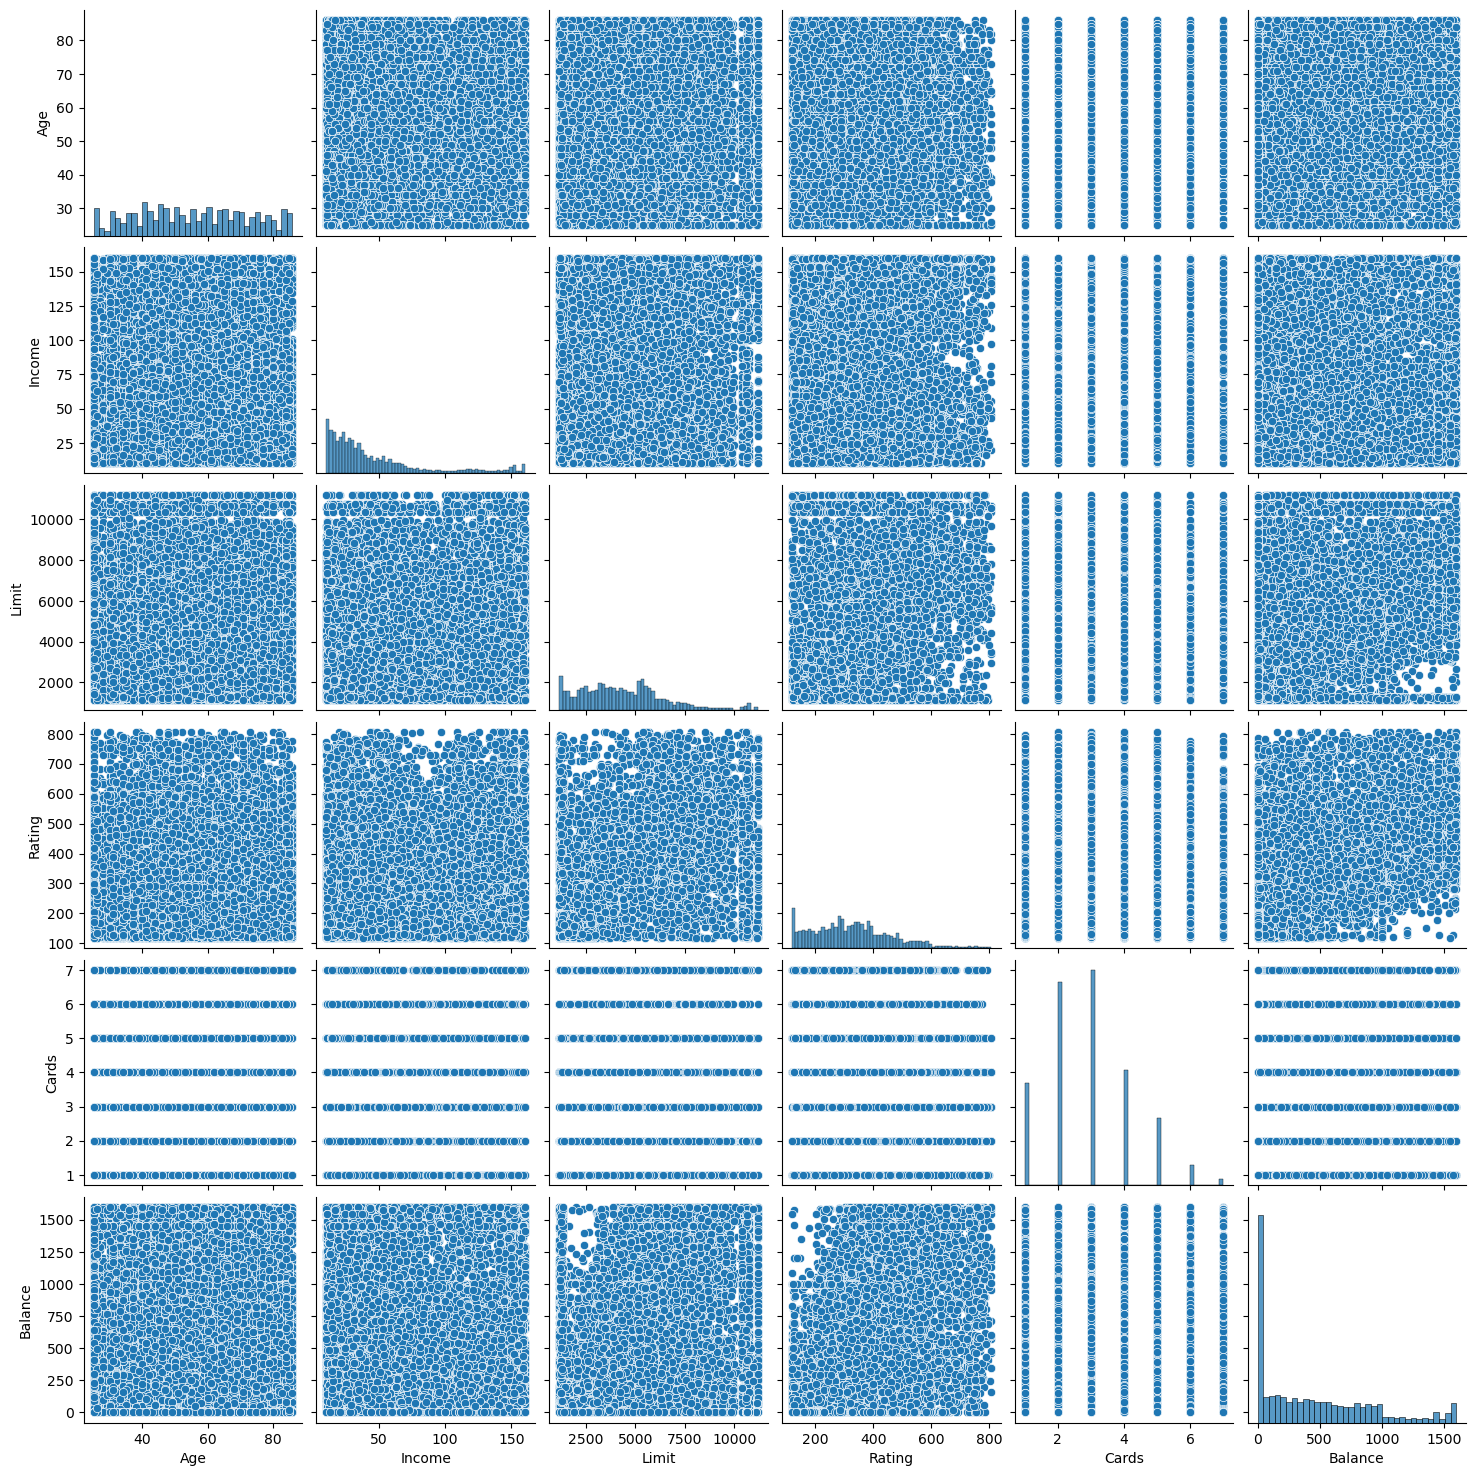

In [119]:
# Observe Bi-variate distributions

BiVarNum_Df = data[['Age', 'Income', 'Limit', 'Rating', 'Cards', 'Balance']]
sns.pairplot(data = BiVarNum_Df)
plt.show()

<Axes: >

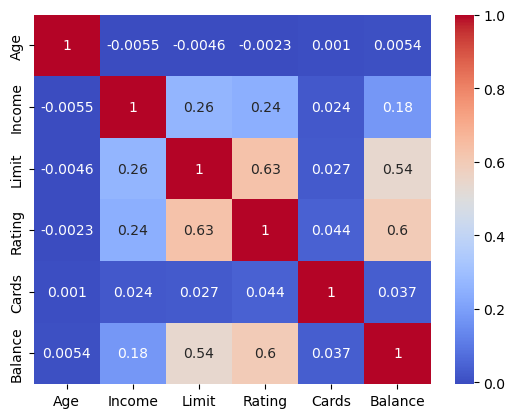

In [120]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [121]:
round(data.corr(),2)

,Age,Income,Limit,Rating,Cards,Balance
Age,1.00,-0.01,-0.00,-0.00,0.00,0.01
Income,-0.01,1.00,0.26,0.24,0.02,0.18
Limit,-0.00,0.26,1.00,0.63,0.03,0.54
Rating,-0.00,0.24,0.63,1.00,0.04,0.60
Cards,0.00,0.02,0.03,0.04,1.00,0.04
Balance,0.01,0.18,0.54,0.60,0.04,1.00


We can infer following finding:
<br>Age is negatively correlated with Income, Card Limit, Rating.
<br>Income is positively correlated with Card Limit, Rating and Balance.
<br>Card Limit is positively correlated with Rating and Balance.
<br>Rating is positively correlated with Card Balance.

### Creating bins for Income

In [122]:
# Creating bins for Income

minVal = data['Income'].min()
maxVal = data['Income'].max()
#bins = np.linspace(minVal,maxVal,5)
bins = [20,33,58,115,161]
slots = ['Low','Average','High','Very High']
data['Income Range'] = pd.cut(data['Income'],bins,labels = slots)

<Axes: xlabel='Income Range', ylabel='Count'>

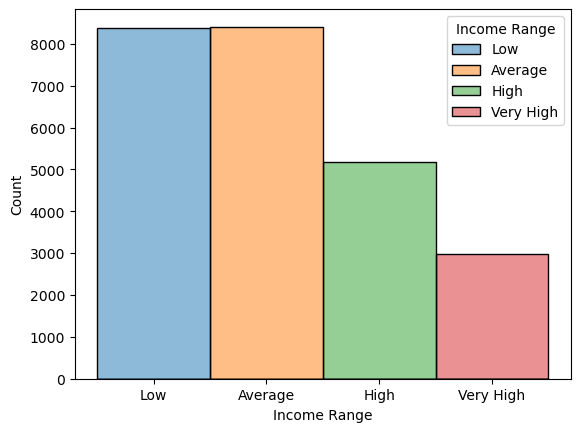

In [124]:
sns.histplot(data, x="Income Range", discrete=True, hue="Income Range")

In [123]:
round(data.groupby('Income Range').count().T)

Income Range,Low,Average,High,Very High
Name,8383,8407,5174,2987
CustomerID,8383,8407,5174,2987
Age,8383,8407,5174,2987
Marital Status,8383,8407,5174,2987
Gender,8383,8407,5174,2987
Ethnicity,8383,8407,5174,2987
Education,8383,8407,5174,2987
Income,8383,8407,5174,2987
Limit,8383,8407,5174,2987
Rating,8383,8407,5174,2987


In [125]:
round(data.groupby('Income Range').describe().T)

Income Range       Low  Average     High  Very High
Age     count   8383.0   8407.0   5174.0     2987.0
        mean      55.0     56.0     56.0       55.0
        std       17.0     17.0     17.0       17.0
        min       25.0     25.0     25.0       25.0
        25%       41.0     42.0     42.0       41.0
        50%       55.0     56.0     55.0       55.0
        75%       69.0     69.0     69.0       68.0
        max       86.0     86.0     86.0       86.0
Income  count   8383.0   8407.0   5174.0     2987.0
        mean      26.0     43.0     77.0      140.0
        std        4.0      7.0     16.0       14.0
        min       20.0     33.0     58.0      115.0
        25%       23.0     37.0     64.0      126.0
        50%       26.0     43.0     72.0      143.0
        75%       29.0     50.0     88.0      152.0
        max       33.0     58.0    115.0      160.0
Limit   count   8383.0   8407.0   5174.0     2987.0
        mean    4106.0   4464.0   4883.0     5789.0
        std     1863.0   2011.0   2321.0     3206.0
        min     1134.0   1134.0   1134.0     1134.0
        25%     2648.0   2941.0   3170.0     2934.0
        50%     3865.0   4390.0   4747.0     5537.0
        75%     5380.0   5638.0   6152.0     8515.0
        max    11200.0  11200.0  11200.0    11200.0
Rating  count   8383.0   8407.0   5174.0     2987.0
        mean     308.0    333.0    357.0      401.0
        std      120.0    130.0    140.0      174.0
        min      119.0    119.0    119.0      119.0
        25%      221.0    237.0    258.0      259.0
        50%      296.0    329.0    346.0      388.0
        75%      382.0    414.0    447.0      534.0
        max      800.0    805.0    805.0      805.0
Cards   count   8383.0   8407.0   5174.0     2987.0
        mean       3.0      3.0      3.0        3.0
        std        1.0      1.0      1.0        1.0
        min        1.0      1.0      1.0        1.0
        25%        2.0      2.0      2.0        2.0
        50%        3.0      3.0      3.0        3.0
        75%        4.0      4.0      4.0        4.0
        max        7.0      7.0      7.0        7.0
Balance count   8383.0   8407.0   5174.0     2987.0
        mean     397.0    448.0    517.0      642.0
        std      426.0    444.0    478.0      536.0
        min        0.0      0.0      0.0        0.0
        25%        0.0      9.0     60.0      130.0
        50%      263.0    345.0    421.0      552.0
        75%      664.0    738.0    840.0     1070.0
        max     1597.0   1597.0   1597.0     1597.0

### Creating bins for Rating

In [126]:
# Creating bins for Rating

minVal = data['Rating'].min()
maxVal = data['Rating'].max()
#bins = np.linspace(minVal,maxVal,5)
bins = [119,224,316,405,805]
slots = ['Low','Average','High','Very High']
data['Rating Range'] = pd.cut(data['Rating'],bins,labels = slots)

<Axes: xlabel='Rating Range', ylabel='Count'>

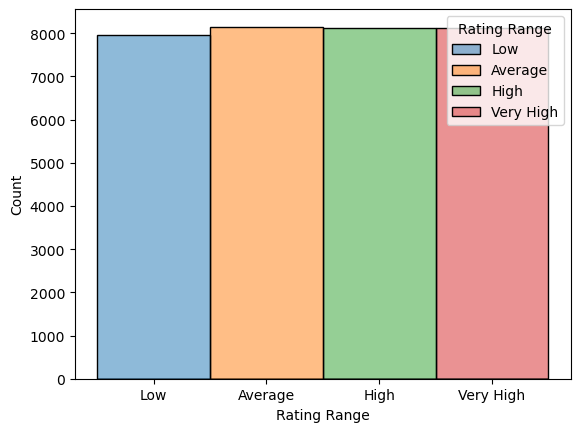

In [127]:
sns.histplot(data, x="Rating Range", discrete=True, hue="Rating Range")

In [128]:
round(data.groupby('Rating Range').count().T)

Rating Range,Low,Average,High,Very High
Name,7966,8152,8127,8124
CustomerID,7966,8152,8127,8124
Age,7966,8152,8127,8124
Marital Status,7966,8152,8127,8124
Gender,7966,8152,8127,8124
Ethnicity,7966,8152,8127,8124
Education,7966,8152,8127,8124
Income,7966,8152,8127,8124
Limit,7966,8152,8127,8124
Rating,7966,8152,8127,8124


### Creating bins for Limit

In [129]:
# Creating bins for Limit

minVal = data['Limit'].min()
maxVal = data['Limit'].max()
#bins = np.linspace(minVal,maxVal,5)
bins = [1134,2727,4178,5636,11200]
slots = ['Low','Average','High','Very High']
data['Limit Range'] = pd.cut(data['Limit'],bins,labels = slots)

<Axes: xlabel='Limit Range', ylabel='Count'>

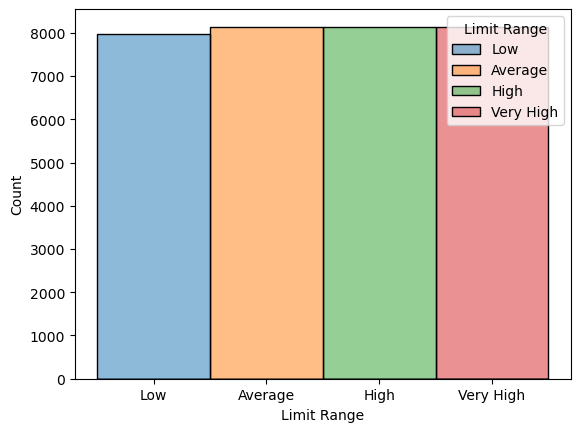

In [130]:
sns.histplot(data, x="Limit Range", discrete=True, hue="Limit Range")

In [131]:
round(data.groupby('Limit Range').count().T)

Limit Range,Low,Average,High,Very High
Name,7971,8137,8141,8131
CustomerID,7971,8137,8141,8131
Age,7971,8137,8141,8131
Marital Status,7971,8137,8141,8131
Gender,7971,8137,8141,8131
Ethnicity,7971,8137,8141,8131
Education,7971,8137,8141,8131
Income,7971,8137,8141,8131
Limit,7971,8137,8141,8131
Rating,7971,8137,8141,8131


### Analysis on relation between Income, Rating and Limit

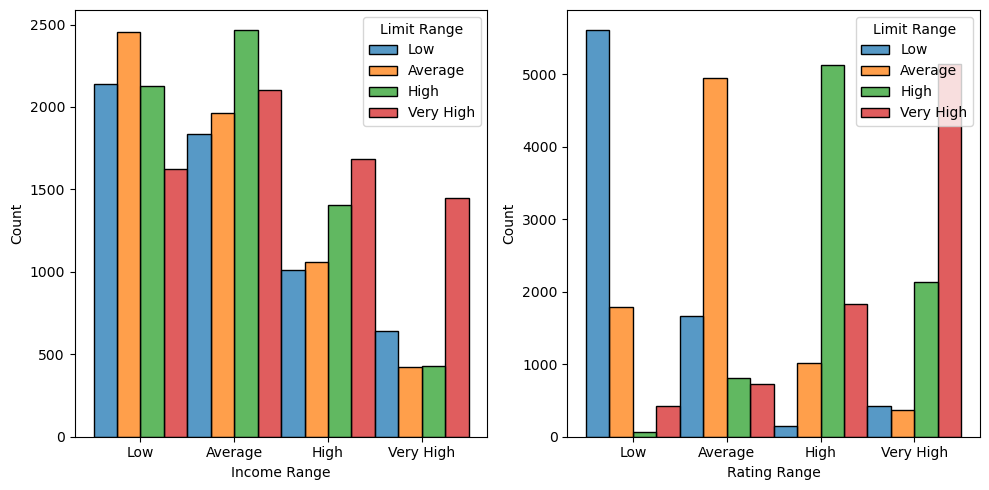

In [132]:
Range = data[['Income Range','Rating Range']]
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))
ax = ax.flatten()

for i, var in enumerate(Range):
    sns.histplot(x=var, data = data, ax = ax[i], bins=5, hue='Limit Range',multiple='dodge')

fig.tight_layout()

Relationship of Limit with Income is positive. However, High and Very High Income need to be consider for Limit enhancement.
<br>Low Income <--> Low Limit
<br>Average Income <--> Low Limit
<br>High Income <--> Average Limit
<br>Very High Income <--> Average Limit

Limit given to card holder as per their ratings.
<br>Low rating       <--> Low limit
<br>Average rating   <--> Average limit
<br>High rating      <--> High limit
<br>Very high rating <--> Very high limit

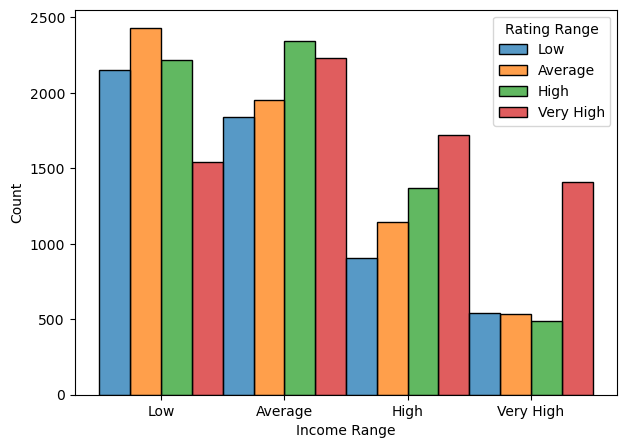

In [133]:
plt.subplots(nrows = 1, ncols = 1, figsize = (7,5))
sns.histplot(x='Income Range', data = data, bins=10, hue='Rating Range',multiple='dodge')
fig.tight_layout()

High and Very High Income customer have poor rating compare to Low and Average Income customer.

### Potentential Customer for limit enhancement

In [134]:
Potential_Customer = data.loc[(((data['Income Range'] == "Very High") & ((data['Limit Range'] == "Low") | (data['Limit Range'] == "Average") | (data['Limit Range'] == "High"))) | ((data['Income Range'] == "High") & ((data['Limit Range'] == "Low") | (data['Limit Range'] == "Average"))))]

In [135]:
Potential_Customer

,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education,Income,Limit,Rating,Cards,Balance,Income Range,Rating Range,Limit Range
11,Perry,0003-MKNFECH,46,Married,Female,African American,Master,128.949,1160,510,3,1442,Very High,Very High,Low
17,Mark,0004-TLHLJA,54,Unmarried,Male,African American,Master,152.298,3510,311,6,0,Very High,Average,Average
19,Rufina,0004-TLHLJCH,55,Unmarried,Male,Caucasian,Master,99.945,3407,244,6,101,High,Average,Average
22,Marra,0004-TLHLJX,27,Unmarried,Female,Caucasian,Secondary,73.546,3210,221,1,136,High,Low,Average
23,Caro,0004-TLHLJZ,49,Married,Female,Caucasian,Master,135.236,2160,183,4,0,Very High,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,Mitch Homer,9978-HYCIN,61,Unmarried,Male,African American,Master,116.914,1861,158,1,0,Very High,Low,Low
32535,Shaniqua Howard,9986-BONCE,60,Unmarried,Female,African American,Senior Secondary,69.231,2272,132,3,0,High,Low,Low
32538,Nannette,9987-LUTYDH,80,Married,Female,Asian,Doctorate,80.375,2588,250,2,401,High,Average,Low
32539,Landon Hudson,9992-RRAMN,48,Married,Male,Asian,Doctorate,152.298,1233,747,2,148,Very High,Very High,Low


In [77]:
# Export Potential_Customer file

Potential_Customer.to_excel("C:\Technology\\HeroVired\\Capston\\Potential Customer.xlsx",index=False)

### Conclusion
Potential Customers should be assigned with dedicated CRM(Customer Relationship Manager).
<br>They should be pushed for premium charged cards and should be guided for its benefit and waiver plans.
<br>Charged cards are beneficial specially for customers with high and very high income as they comes with bundles of membership in travels, accommodations, dinning, etc.
<br>Although revenue is generated through interest on amount utilized. However, Customers with balance = 0 should be given attention for converting their outstanding to EMI and scope of Limit enhancement if possible.